In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [4]:
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [5]:
df_train = train.copy()
df_test = test.copy()

In [6]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']
X_test = test.drop(['label'], axis=1)
y_test = test['label']

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

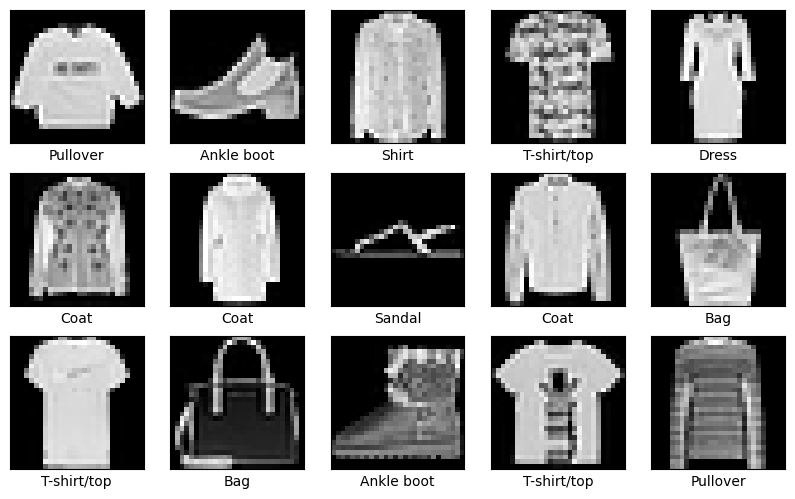

In [7]:
X_train = X_train.values.reshape(-1, 28, 28)
X_test = X_test.values.reshape(-1, 28, 28)

fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i], cmap='gray')  
    axi.set(xticks=[], yticks=[],
            xlabel=label_names[y_train.iloc[i]])  
plt.show()

In [8]:
X_train= df_train.drop(['label'],axis = 1)
X_test = df_train['label']
y_train = df_train['label']
y_test = df_test.drop(['label'],axis = 1)

X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_train /= 255.0
y_test /=255.0

In [9]:
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_test, test_size=0.1, random_state = seed)

In [10]:
pca = PCA(n_components=100, random_state=42)
X_train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)
y_test_pca =pca.transform(y_test)

In [11]:
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [12]:
svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_PCA1, y_train)

SVC(C=13, gamma='auto', probability=True)

In [13]:
y_pred = svc.predict(X_test_pca)

In [14]:
X_train_image = train.drop(['label'], axis=1)
y_train_image = train['label']
X_test_image = test.drop(['label'], axis=1)
y_test_image = test['label']

X_train_image = X_train_image.astype('float32') / 255.0
X_test_image = X_test_image.astype('float32') / 255.0

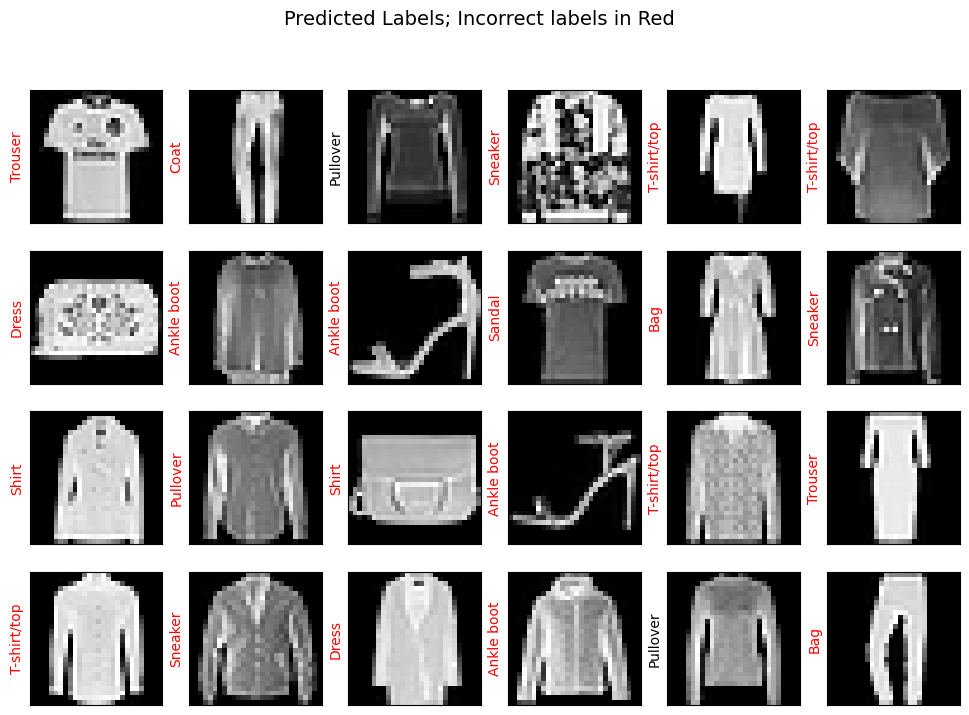

In [15]:
fig, ax = plt.subplots(4, 6, figsize=(12, 8)) 
for i, axi in enumerate(ax.flat):
    if i < len(X_test_image):  
        axi.imshow(X_test_image.iloc[i].values.reshape(28, 28), cmap='gray') 
        axi.set(xticks=[], yticks=[])
        true_label = label_names[y_test_image.iloc[i]]
        predicted_label = label_names[y_pred[i]]
        color = 'black' if true_label == predicted_label else 'red'
        axi.set_ylabel(f"{predicted_label}", color=color)

fig.suptitle('Predicted Labels; Incorrect labels in Red', size=14)
plt.show()

In [16]:
y_train_svc = svc.predict(X_train_PCA1)
y_pred_svc = svc.predict(X_test_pca)
svc_train = metrics.accuracy_score(y_train,y_train_svc)
svc_accuracy = metrics.accuracy_score(y_val, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train))
print("Test Accuracy score: {}".format(svc_accuracy))
print(metrics.classification_report(y_val, y_pred_svc))

Train Accuracy score: 0.9425555555555556
Test Accuracy score: 0.906
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       574
           1       0.99      0.98      0.99       596
           2       0.83      0.85      0.84       573
           3       0.91      0.93      0.92       624
           4       0.86      0.85      0.85       635
           5       0.98      0.95      0.96       632
           6       0.76      0.74      0.75       600
           7       0.93      0.97      0.95       604
           8       0.97      0.97      0.97       598
           9       0.97      0.96      0.96       564

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



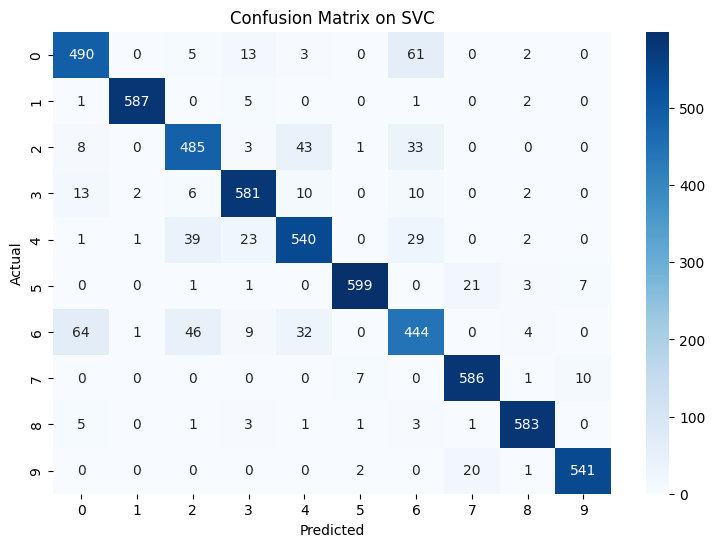

In [17]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svc, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()